In [213]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm
import numpy as np
import itertools

##### ***Contexto***

Você é analista de dados júnior na Biaggi Consulting. O time pedagógico acredita que a implementação de um curso preparatório (“test preparation course”) pode melhorar o desempenho dos alunos nas avaliações finais. Eles querem tomar uma decisão baseada em dados para saber se devem expandir esse curso para todos os estudantes.

O time quer sua ajuda para responder às seguintes perguntas:

- A média das notas de matemática dos alunos que fizeram o curso preparatório é maior do que daqueles que não fizeram?
- A proporção de alunos aprovados em matemática (nota ≥ 60) é maior entre os que fizeram o curso preparatório?

**Nota:** Considere que as distribuições de notas possuem variâncias iguais, o que permite a aplicação de testes estatísticos que assumem homocedasticidade.

*Vá além:* (Sugestão de análises extras)
- Existe diferença significativa nas notas de leitura, escrita, matematica e média das notas entre os grupos?
- A eficácia do curso varia por gênero? Realize testes separados para meninos e meninas.
- Existe a possibilidade de haver viés de seleção?
- Qual o impacto potencial em termos de número de aprovados, caso o curso seja implementado para todos? Estime cenários de expansão.

##### *EDA*

In [ ]:

StudentsPerformance = pd.read_csv('../data/04. Teste de hipóteses médias e proporções/StudentsPerformance.csv')
StudentsPerformance['mean score'] = (StudentsPerformance[['math score','reading score','writing score']].sum(axis=1)/3).round(2)

print(StudentsPerformance.shape)
display(
    pd.DataFrame({
        'Tipo': StudentsPerformance.dtypes,
        'Qtde nulos': StudentsPerformance.isnull().sum(),
        'Proporção nulos': StudentsPerformance.isnull().mean(),
        'Qtde unicos': StudentsPerformance.nunique(),
        'Exemplo unicos': StudentsPerformance.apply(lambda x: x.unique()[:3])
    })
)

(1000, 9)


,Tipo,Qtde nulos,Proporção nulos,Qtde unicos,Exemplo unicos
gender,object,0,0.0,2,"[female, male]"
race/ethnicity,object,0,0.0,5,"[group B, group C, group A]"
parental level of education,object,0,0.0,6,"[bachelor's degree, some college, master's deg..."
lunch,object,0,0.0,2,"[standard, free/reduced]"
test preparation course,object,0,0.0,2,"[none, completed]"
math score,int64,0,0.0,81,"[72, 69, 90]"
reading score,int64,0,0.0,72,"[72, 90, 95]"
writing score,int64,0,0.0,77,"[74, 88, 93]"
mean score,float64,0,0.0,194,"[72.67, 82.33, 92.67]"


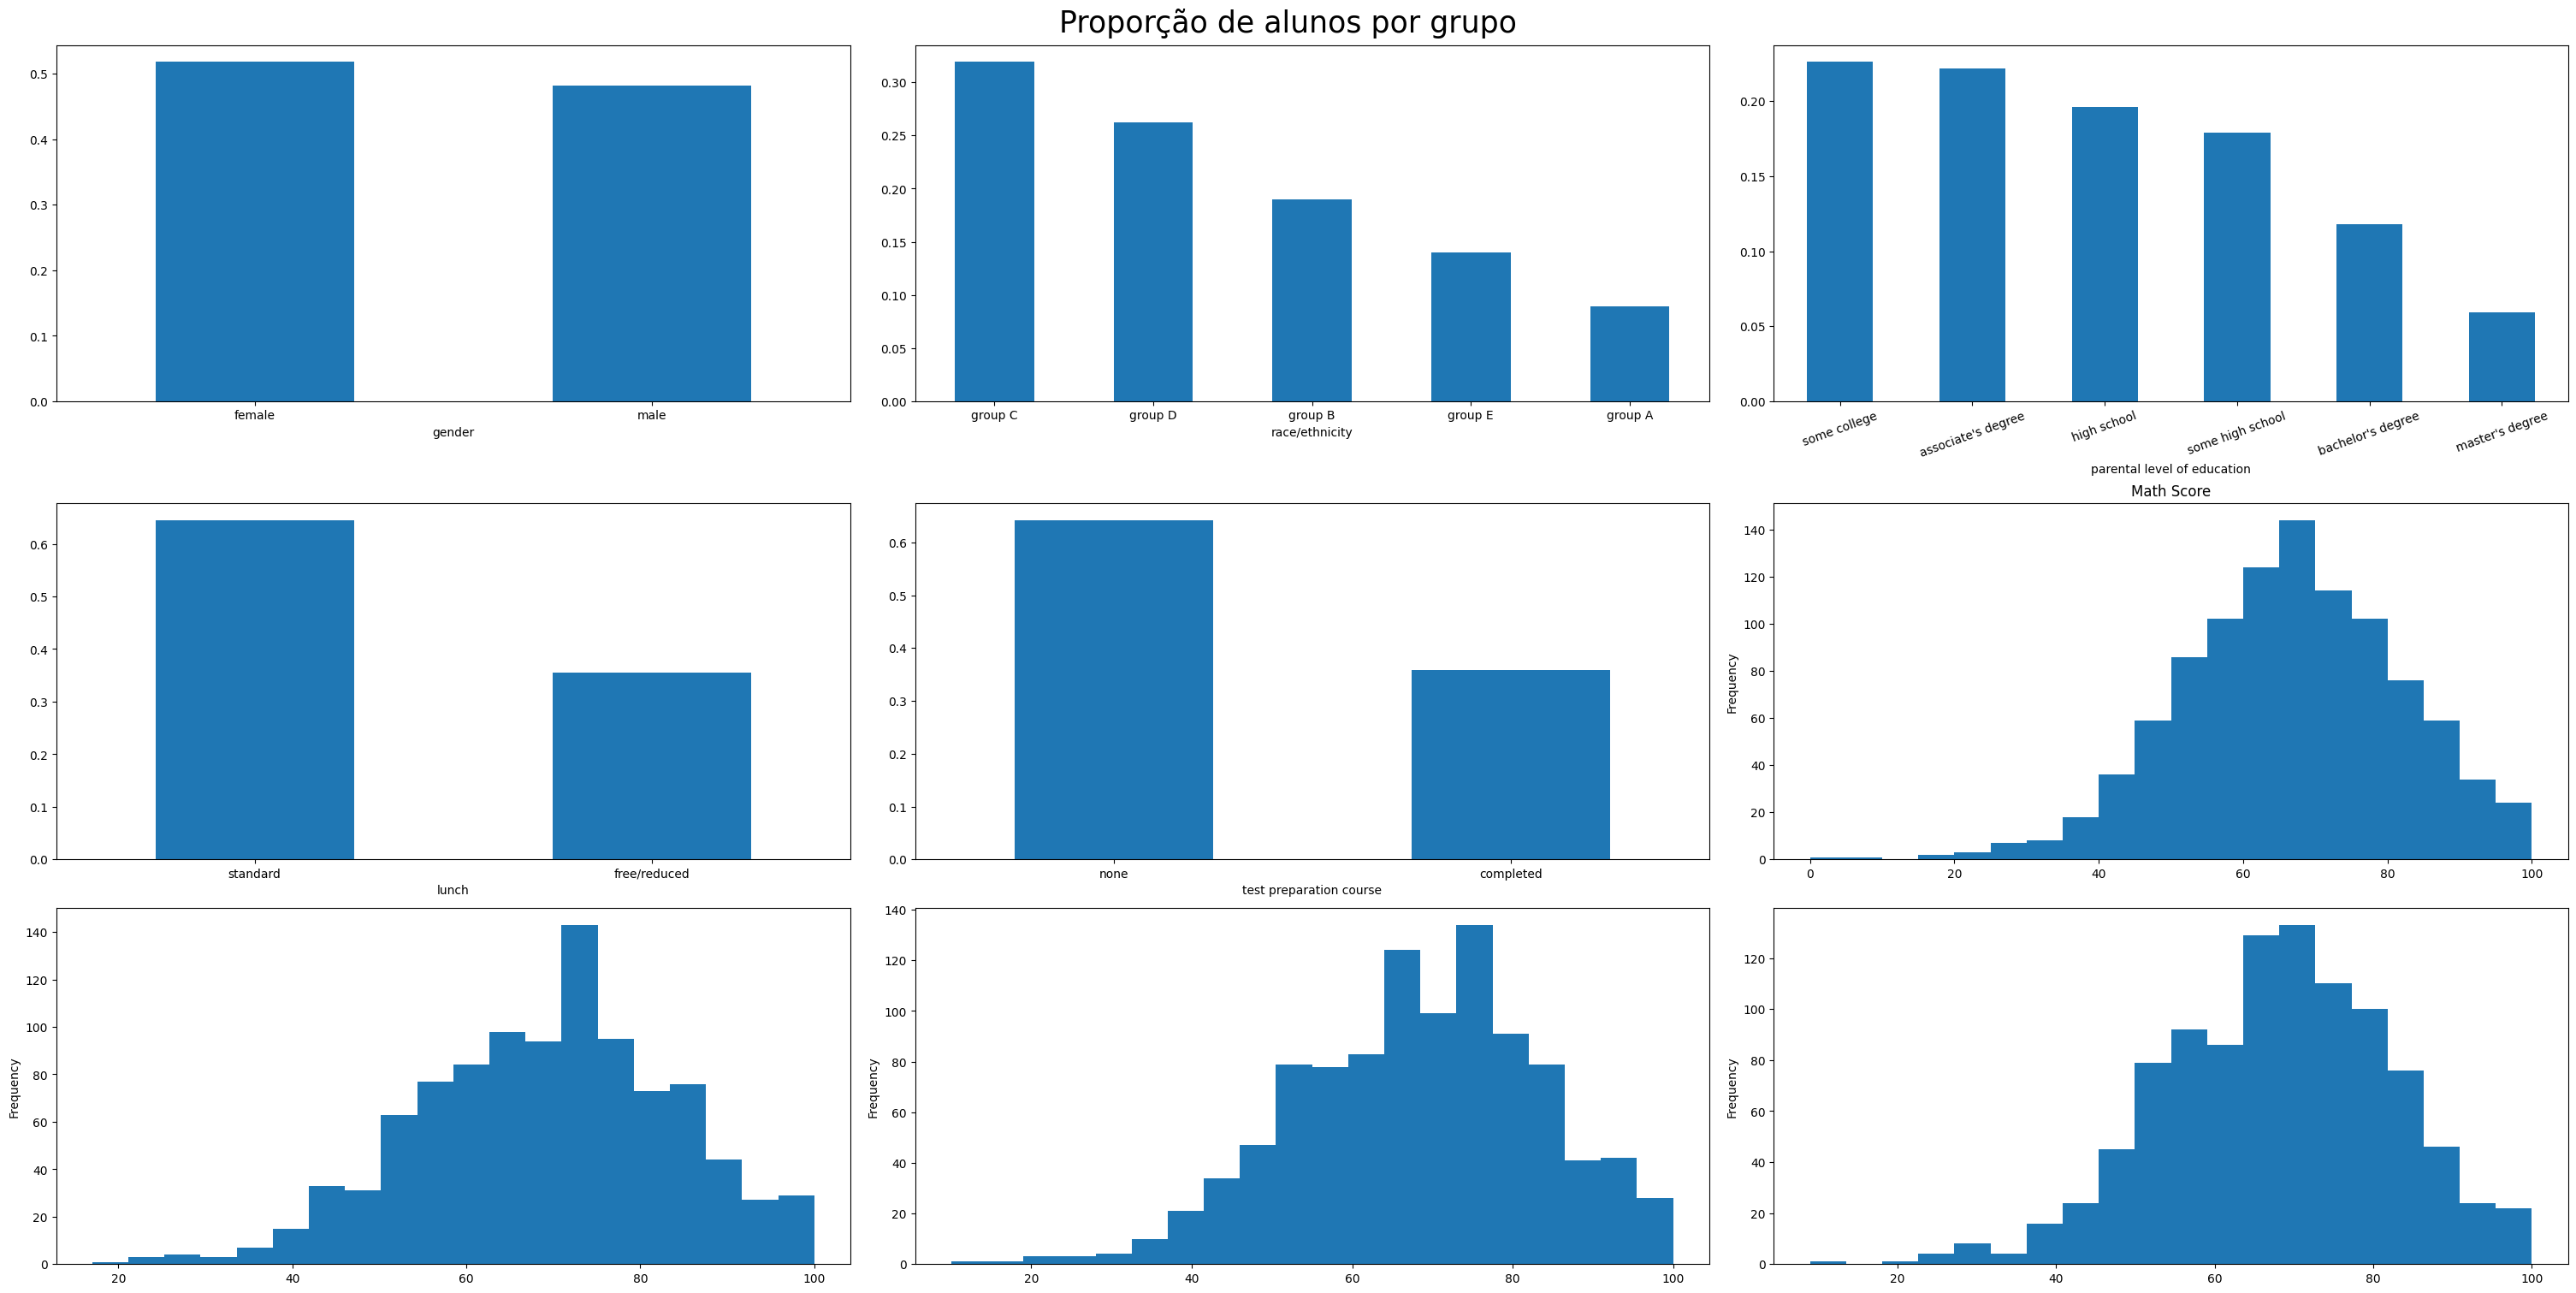

In [ ]:

plt.close()
fig, axs = plt.subplots(3, 3, figsize=(30, 15), constrained_layout=True)
fig.suptitle('Proporção de alunos por grupo', fontsize=25)

(StudentsPerformance['gender'].value_counts()/StudentsPerformance.shape[0]).plot.bar(rot=0, ax=axs[0][0])
(StudentsPerformance['race/ethnicity'].value_counts()/StudentsPerformance.shape[0]).plot.bar(rot=0, ax=axs[0][1])
(StudentsPerformance['parental level of education'].value_counts()/StudentsPerformance.shape[0]).plot.bar(rot=20, ax=axs[0][2])
(StudentsPerformance['lunch'].value_counts()/StudentsPerformance.shape[0]).plot.bar(rot=0, ax=axs[1][0])
(StudentsPerformance['test preparation course'].value_counts()/StudentsPerformance.shape[0]).plot.bar(rot=0, ax=axs[1][1])
StudentsPerformance['math score'].plot.hist(rot=0, ax=axs[1][2], bins=20, title='Math Score')
StudentsPerformance['reading score'].plot.hist(rot=0, ax=axs[2][0], bins=20)
StudentsPerformance['writing score'].plot.hist(rot=0, ax=axs[2][1], bins=20)
StudentsPerformance['mean score'].plot.hist(rot=0, ax=axs[2][2], bins=20)

plt.show()

In [ ]:

display(StudentsPerformance[[x for x in StudentsPerformance.columns if 'score' in x]].describe())
### a distribuição dos scores seguem uma distribuição normal.

,math score,reading score,writing score,mean score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770580
std,15.16308,14.600192,15.195657,14.257311
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.330000
50%,66.00000,70.000000,69.000000,68.330000
75%,77.00000,79.000000,79.000000,77.670000
max,100.00000,100.000000,100.000000,100.000000


#### **Principal**

##### - *A média das notas de matemática dos alunos que fizeram o curso preparatório é maior do que daqueles que não fizeram?*

In [ ]:

print(t.ppf(0.5, 100)) ## quem é o percentil 0.5
# 0 ~= 6.654605374702225e-17
print(t.cdf(0, 100))   ## qual o valor acumulado a esquerda até o 0 (~= 6.654605374702225e-17) ~~ nessa distribuição existe uma probabilidade de "t.cdf(0, 100)" de retirar o valor 0 ou menor

6.654605374702225e-17
0.5


mean score: 72.66946927374302 > 65.03880062305296 - p-value: 1.1102230246251565e-16
writing score: 74.41899441340782 > 64.50467289719626 - p-value: 0.0
reading score: 73.89385474860335 > 66.53426791277259 - p-value: 4.551914400963142e-15
math score: 69.69553072625699 > 64.0778816199377 - p-value: 7.679567315399538e-09

R: Sim, em todas as disciplinas a média do score é maior para alunos com curso de preparação completo, i.e. existe uma tendencia de tirar nota maiores caso um aluno conclua o curso de preparação.


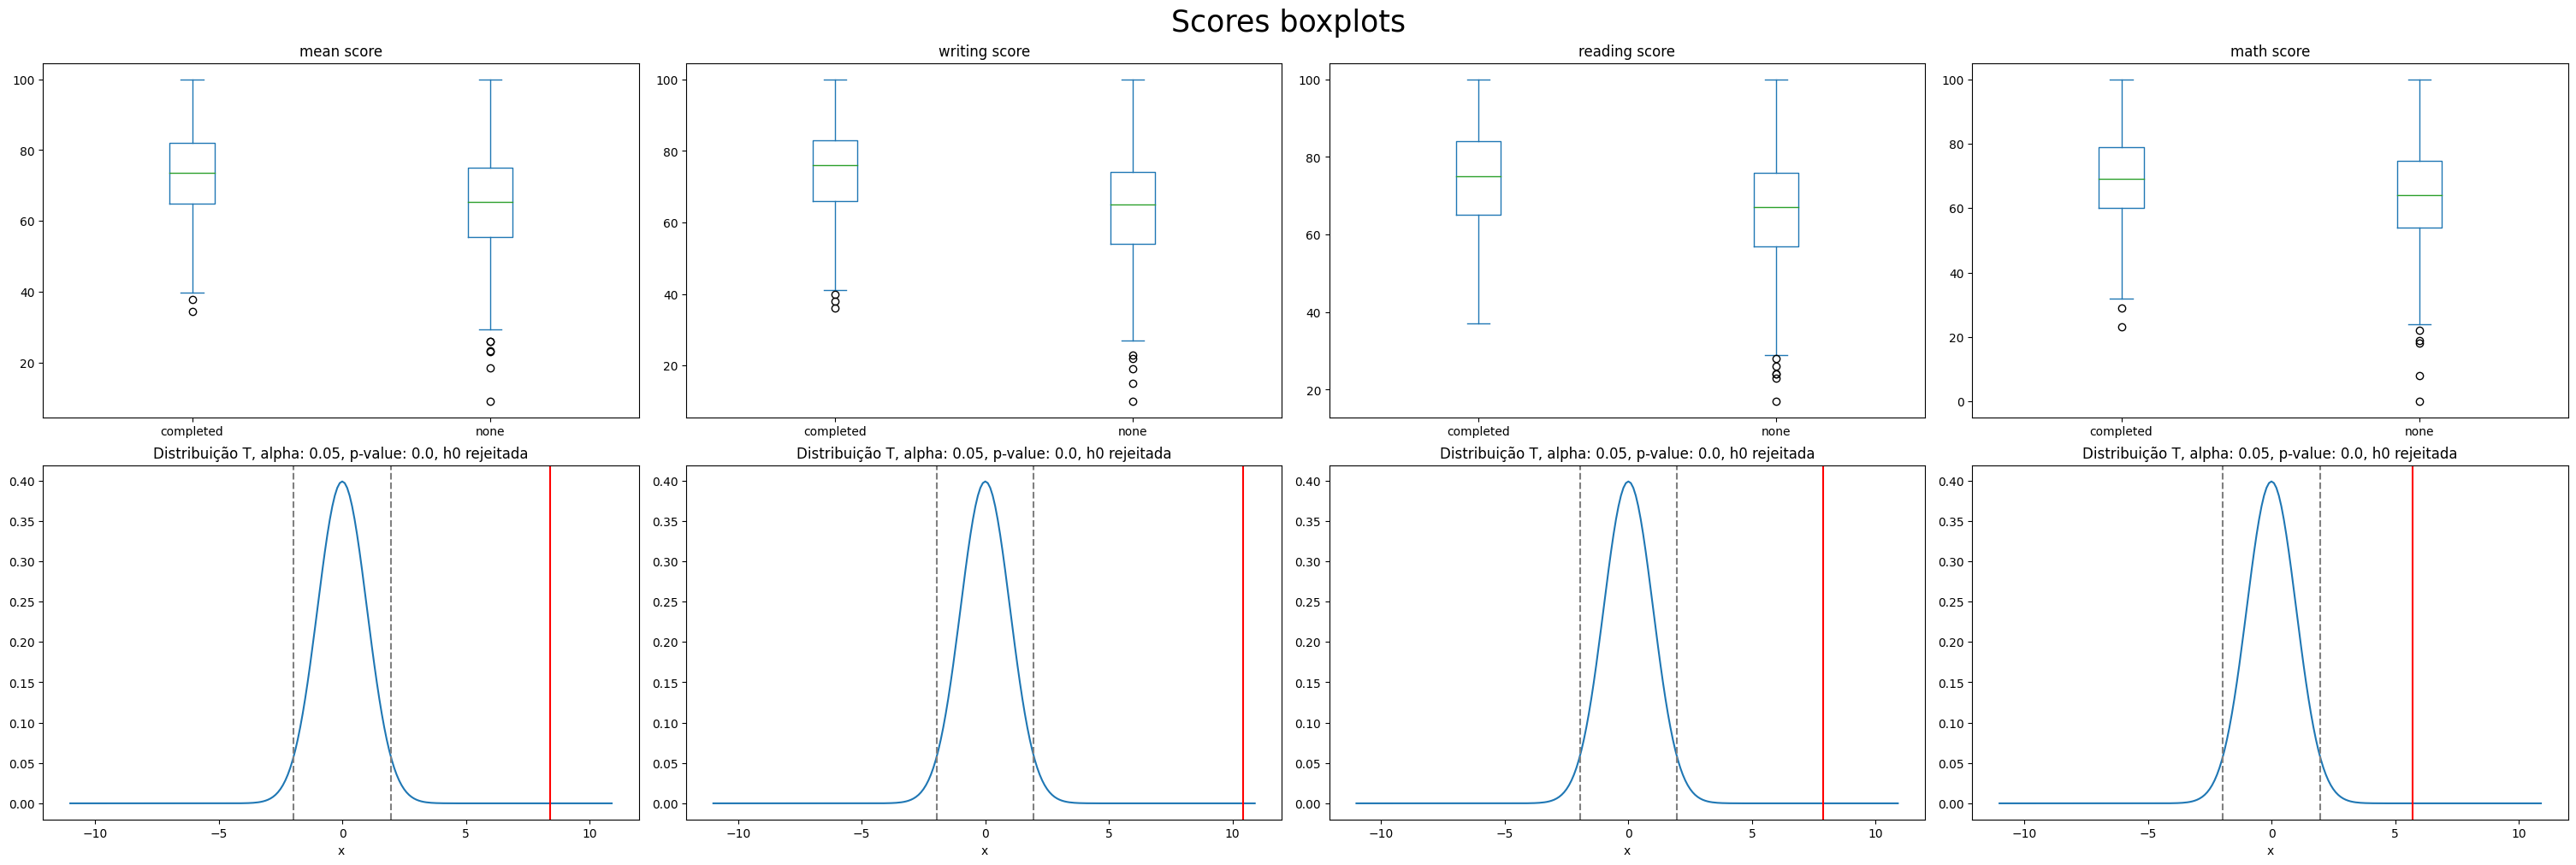

In [ ]:

# StudentsPerformance[['test preparation course', 'math score','reading score','writing score','mean score']]

plt.close()
fig, axs = plt.subplots(2, 4, figsize=(30, 10), constrained_layout=True)
fig.suptitle('Scores boxplots', fontsize=25)

score_cols = [x for x in StudentsPerformance.columns if 'score' in x]
score_cols.reverse()
for i, score_col in enumerate(score_cols):
    StudentsPerformance[['test preparation course', score_col]].plot.box(ax=axs[0][i], by='test preparation course')

    ## teste de hipotese
    # h0. m1  = m2
    # ha. m1 != m2
    c = .95
    alpha = 1-c

    m1 = StudentsPerformance[StudentsPerformance['test preparation course'] == 'completed'][score_col].mean()
    n1 = StudentsPerformance[StudentsPerformance['test preparation course'] == 'completed'].shape[0]
    s21 = StudentsPerformance[StudentsPerformance['test preparation course'] == 'completed'][score_col].var()

    m2 = StudentsPerformance[StudentsPerformance['test preparation course'] == 'none'][score_col].mean()
    n2 = StudentsPerformance[StudentsPerformance['test preparation course'] == 'none'].shape[0]
    s22 = StudentsPerformance[StudentsPerformance['test preparation course'] == 'none'][score_col].var()

    sp = (( (n1-1)*s21 + (n2-1)*s22 )/( n1+n2-2 ))**(1/2)
    t_calculado = (m1-m2)/(sp*(1/n1+1/n2)**(1/2))
    df = n1+n2-2

    ts_critico = t.ppf(alpha/2, df), t.ppf(c+alpha/2, df)
    p_value = 1-t.cdf(t_calculado, df)

    t_distr = pd.DataFrame({'x':np.arange(-11, 11, .1),'y': t.pdf(np.arange(-11, 11, .1),df)}).plot(x='x',y='y',ax=axs[1][i], title=f"Distribuição T, alpha: {round(alpha, 2)}, p-value: {round(p_value, 4)}, {'h0 rejeitada' if p_value <= alpha else 'h0 aceita'}", legend=False)
    axs[1][i].axvline(x=ts_critico[0], color='gray', linestyle='--', label='t-critico inferior')
    axs[1][i].axvline(x=ts_critico[1], color='gray', linestyle='--', label='t-critico superior')
    axs[1][i].axvline(x=t_calculado, color='r', linestyle='-', label='t-calculado')

    print(score_col+':', m1, '>' if m1 >= m2 else '<', m2, f'- p-value: {p_value}')

print()
print('R: Sim, em todas as disciplinas a média do score é maior para alunos com curso de preparação completo, i.e. existe uma tendencia de tirar nota maiores caso um aluno conclua o curso de preparação.')

plt.show()

##### - *A proporção de alunos aprovados em matemática (nota ≥ 60) é maior entre os que fizeram o curso preparatório?*

aproved in math: 0.7569832402234636 > 0.632398753894081 - p-value: 2.683601119368717e-05
aproved in writing: 0.8603351955307262 > 0.6401869158878505 - p-value: 5.6288307348495437e-14
aproved in reading: 0.8435754189944135 > 0.6915887850467289 - p-value: 6.005772235084805e-08

R: Sim, em todas as disciplinas a proporção de aprovação é maior para alunos com curso de preparação completo, i.e. existe uma tendência de ser aprovado caso um aluno conclua o curso de preparação.


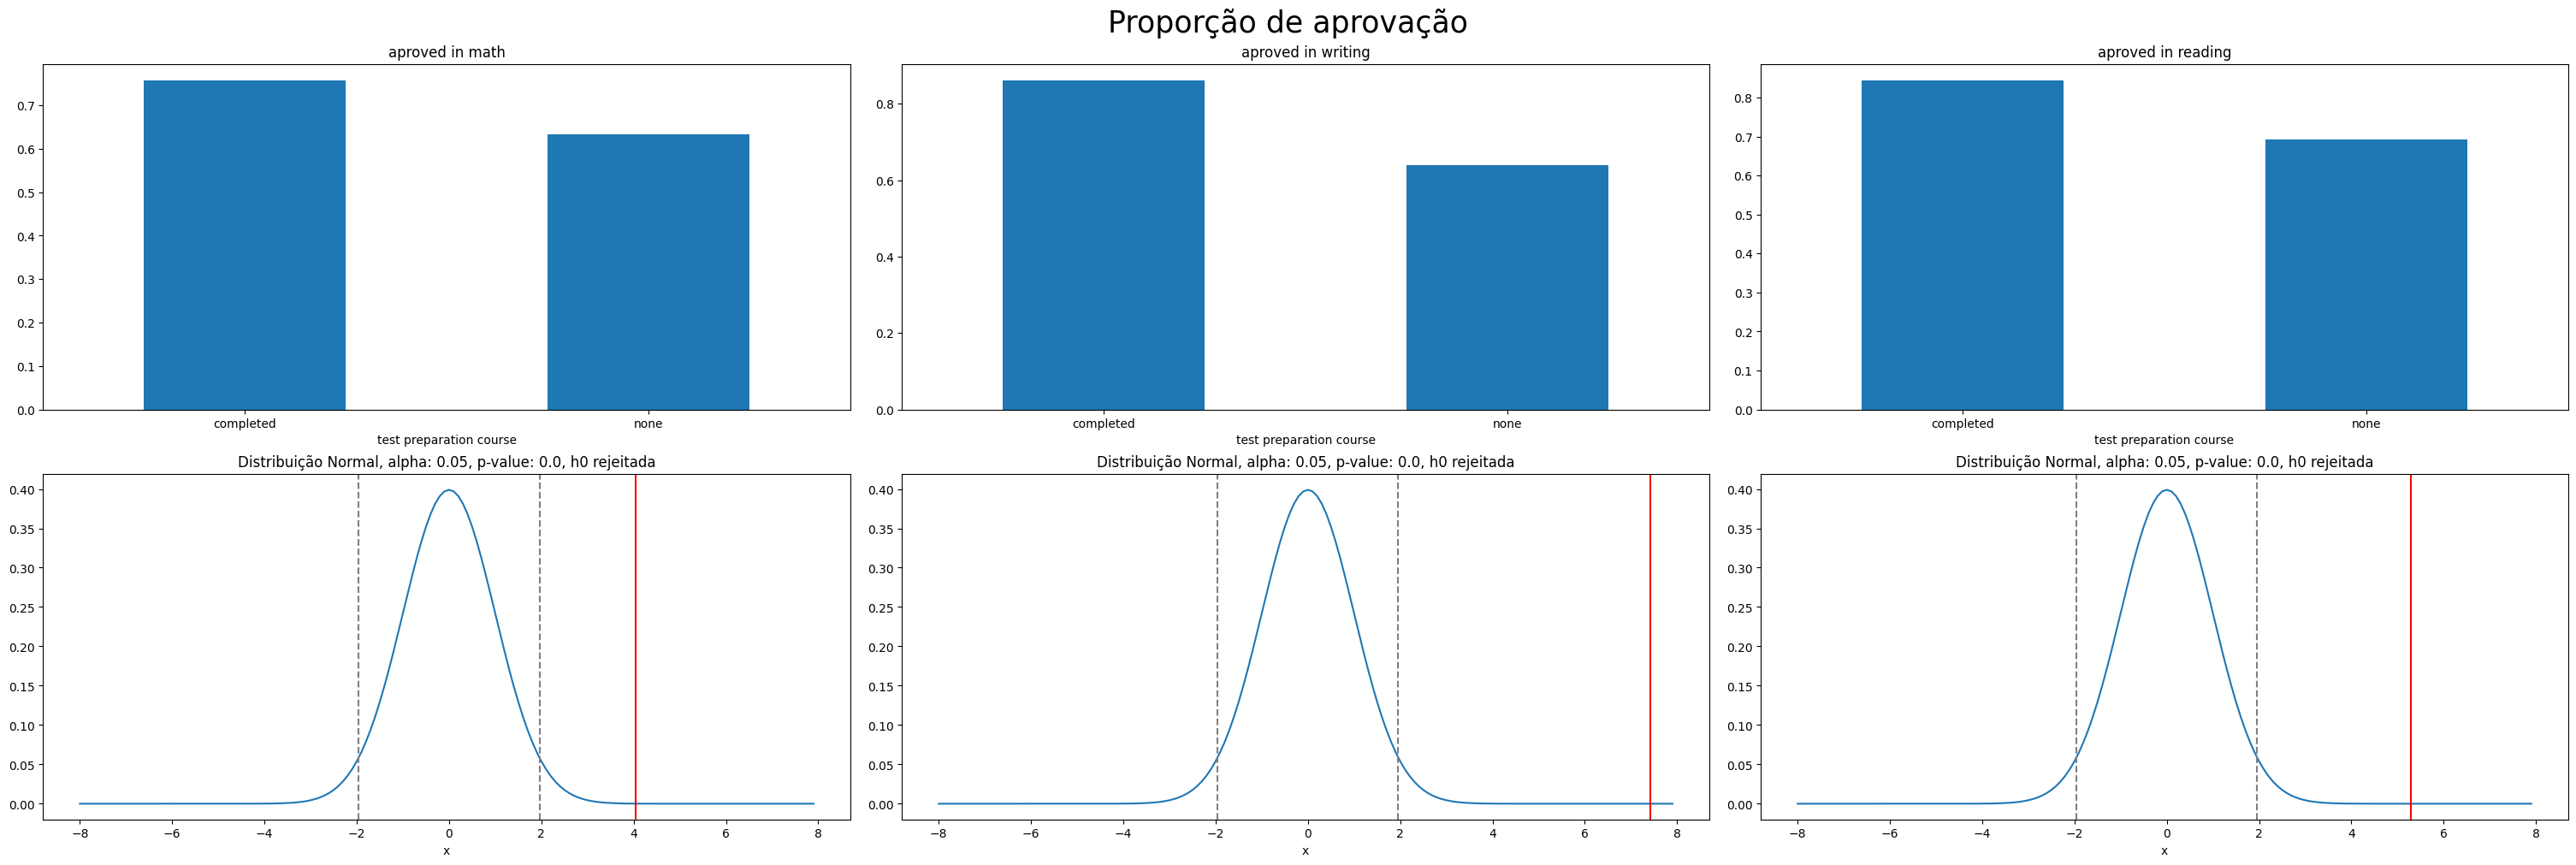

In [ ]:

StudentsPerformance['aproved in math'] = StudentsPerformance['math score'].apply(lambda x: 1 if x >= 60 else 0)
StudentsPerformance['aproved in writing'] = StudentsPerformance['writing score'].apply(lambda x: 1 if x >= 60 else 0)
StudentsPerformance['aproved in reading'] = StudentsPerformance['reading score'].apply(lambda x: 1 if x >= 60 else 0)

plt.close()
fig, axs = plt.subplots(2, 3, figsize=(30, 10), constrained_layout=True)
fig.suptitle('Proporção de aprovação', fontsize=25)

aproved_cols = [x for x in StudentsPerformance.columns if 'aproved' in x]
for i, aproved_col in enumerate(aproved_cols):
    StudentsPerformance.groupby('test preparation course')[aproved_col].mean().plot(kind='bar', ax=axs[0][i], rot=0, title=aproved_col)

    ## teste de hipotese
    # h0. p1  = p2
    # ha. p1 != p2
    c = .95
    alpha = 1-c

    x1 = StudentsPerformance[StudentsPerformance['test preparation course'] == 'completed'][aproved_col].sum()
    n1 = StudentsPerformance[StudentsPerformance['test preparation course'] == 'completed'].shape[0]
    p1 = x1/n1

    x2 = StudentsPerformance[StudentsPerformance['test preparation course'] == 'none'][aproved_col].sum()
    n2 = StudentsPerformance[StudentsPerformance['test preparation course'] == 'none'].shape[0]
    p2 = x2/n2
    
    p = (x1+x2)/(n1+n2)

    z_calculado = (p1-p2)/(p*(1-p)*(1/n1+1/n2))**(1/2)
    p_value = 1-norm.cdf(z_calculado)

    zs_critico = norm.ppf(alpha/2), norm.ppf(c+alpha/2)

    norm_distr = pd.DataFrame({'x':np.arange(-8, 8, .1),'y': norm.pdf(np.arange(-8, 8, .1))}).plot(
        x='x',y='y',ax=axs[1][i], title=f"Distribuição Normal, alpha: {round(alpha, 2)}, p-value: {round(p_value, 4)}, {'h0 rejeitada' if p_value <= alpha else 'h0 aceita'}", legend=False)
    axs[1][i].axvline(x=zs_critico[0], color='gray', linestyle='--', label='z-critico inferior')
    axs[1][i].axvline(x=zs_critico[1], color='gray', linestyle='--', label='z-critico superior')
    axs[1][i].axvline(x=z_calculado, color='r', linestyle='-', label='z-calculado')

    print(aproved_col+':', p1, '>' if p1 >= p2 else '<', p2, f'- p-value: {p_value}')

print()
print('R: Sim, em todas as disciplinas a proporção de aprovação é maior para alunos com curso de preparação completo, i.e. existe uma tendência de ser aprovado caso um aluno conclua o curso de preparação.')
plt.show()

#### **Extra**

##### - *Existe diferença significativa nas notas de leitura, escrita, matematica e média das notas entre os grupos?*

---- math score ----
gender
('female', 'male'), diferença significativa com p-value = 4.560092774664411e-08, logo female(63.63) < male(68.72821576763485)

race/ethnicity
('group B', 'group C'), diferença NÃO significativa com p-value = 0.2323854469583726, logo group B(63.45) = group C(64.46394984326018)
('group B', 'group A'), diferença NÃO significativa com p-value = 0.17517079808299785, logo group B(63.45) = group A(61.62921348314607)
('group B', 'group D'), diferença significativa com p-value = 0.0024430985685520924, logo group B(63.45) < group D(67.36259541984732)
('group B', 'group E'), diferença significativa com p-value = 2.503973023748985e-09, logo group B(63.45) < group E(73.82142857142857)
('group C', 'group A'), diferença NÃO significativa com p-value = 0.055219053727940226, logo group C(64.46) = group A(61.62921348314607)
('group C', 'group D'), diferença significativa com p-value = 0.007944174778008142, logo group C(64.46) < group D(67.36259541984732)
('group C', 'group E'

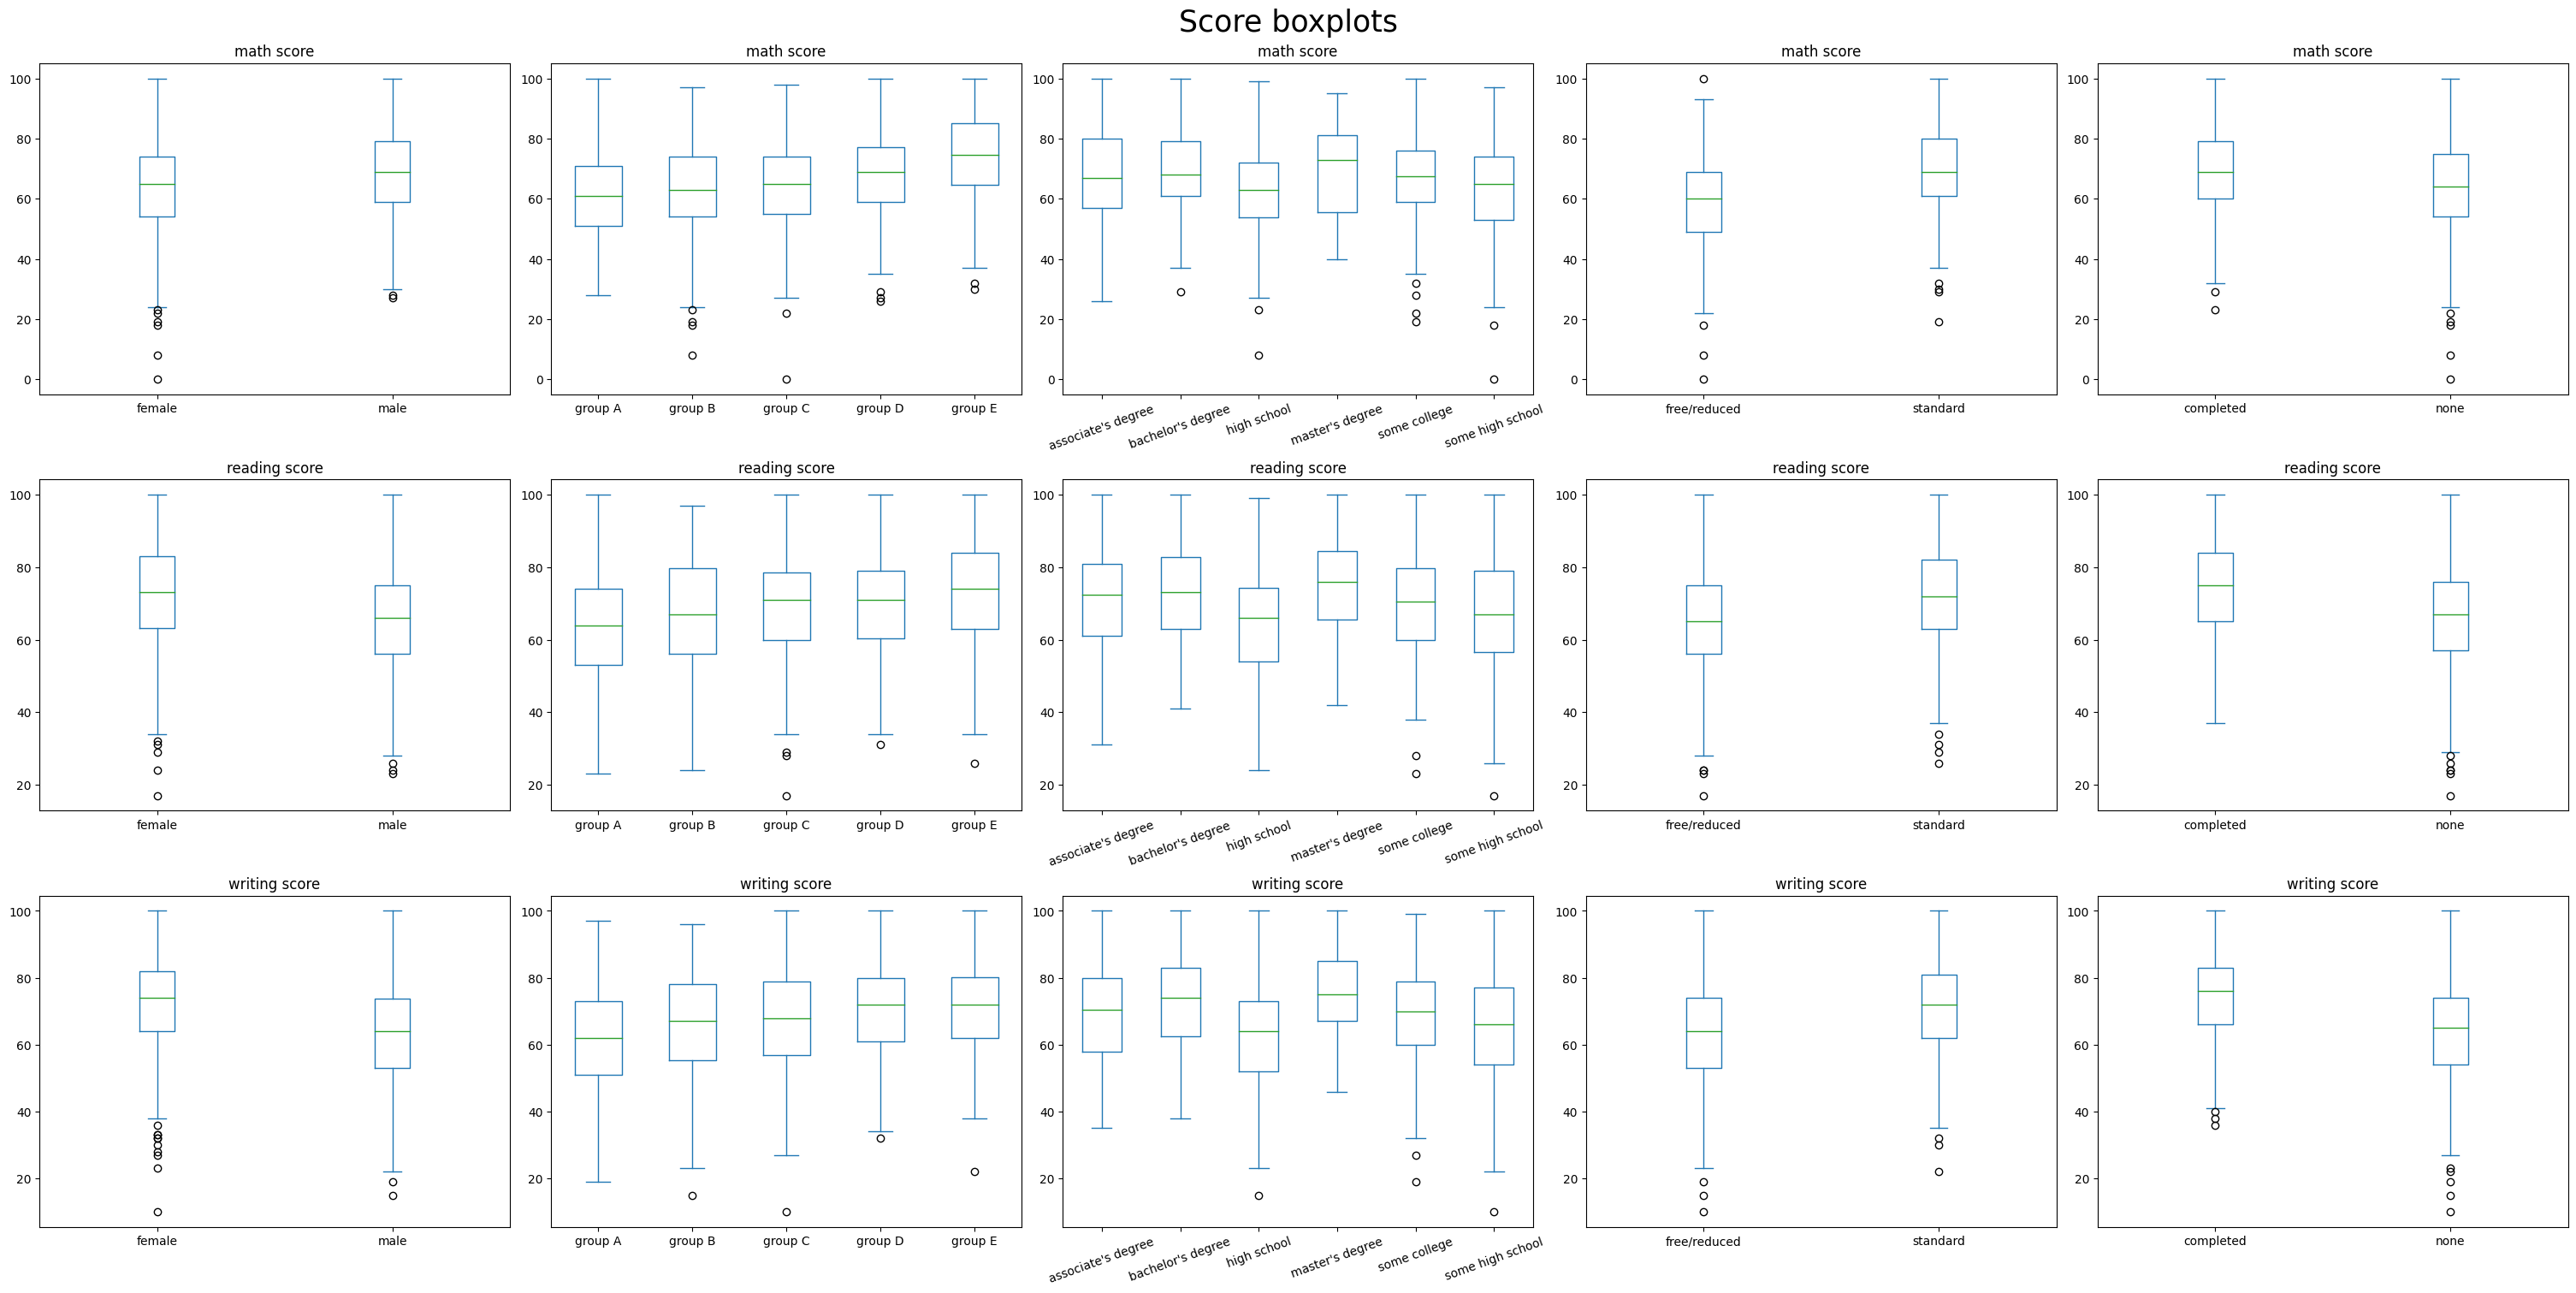

In [ ]:

plt.close()

score_cols = [x for x in StudentsPerformance.columns if 'score' in x and 'mean' not in x]
groups_cols = [x for x in StudentsPerformance.columns if 'score' not in x and 'aproved' not in x]

fig, axs = plt.subplots(len(score_cols), len(groups_cols), figsize=(30, 5*len(score_cols)), constrained_layout=True)
fig.suptitle('Score boxplots', fontsize=25)

for j, score_col in enumerate(score_cols):
    print('----', score_col, '----')
    for i, groups_col in enumerate(groups_cols):
        StudentsPerformance[[groups_col, score_col]].plot.box(by=groups_col, ax=axs[j][i], rot=20 if groups_col == 'parental level of education' else 0)

        print(groups_col)
        groups_tuple = list(itertools.combinations(StudentsPerformance[groups_col].unique(), 2))
        for tuple in groups_tuple:
            ## teste de hipotese
            # h0. m1  = m2
            # ha. m1 != m2
            c = .95
            alpha = 1-c

            m1 = StudentsPerformance[StudentsPerformance[groups_col] == tuple[0]]['math score'].mean()
            n1 = StudentsPerformance[StudentsPerformance[groups_col] == tuple[0]].shape[0]
            s21 = StudentsPerformance[StudentsPerformance[groups_col] == tuple[0]]['math score'].var()

            m2 = StudentsPerformance[StudentsPerformance[groups_col] == tuple[1]][score_col].mean()
            n2 = StudentsPerformance[StudentsPerformance[groups_col] == tuple[1]].shape[0]
            s22 = StudentsPerformance[StudentsPerformance[groups_col] == tuple[1]][score_col].var()

            sp = (( (n1-1)*s21 + (n2-1)*s22 )/( n1+n2-2 ))**(1/2)
            t_calculado = (m1-m2)/(sp*(1/n1+1/n2)**(1/2))
            df = n1+n2-2

            p_value = 1-t.cdf(t_calculado, df) if t_calculado >= 0 else t.cdf(t_calculado, df)

            if p_value <= alpha: print(f"{tuple}, diferença significativa com p-value = {p_value}, logo {tuple[0]}({round(m1, 2)}) {'>' if m1 >= m2 else '<'} {tuple[1]}({m2})")
            else: print(f"{tuple}, diferença NÃO significativa com p-value = {p_value}, logo {tuple[0]}({round(m1, 2)}) = {tuple[1]}({m2})")
        print()

print('R: Sim, diferenças significativas acima.')
print(
    '''obs.: 
        pra todos os grupos menos pro grupo "gender" as diferenças entre as médias dos scores é semelhante, i.e. esses grupos "criam" as mesmas tendencias em relação a média dos scores.
        isso só não vale para gender, onde observamos que em "math" existe a tendencia de "male" tire notas maiores que "female" e em "reading" existe a tendencia de "female" tire notas maiores que "male". em "writing" não existe diferença significativa.
    '''
    )
plt.show()

##### - *A eficácia do curso varia por gênero?*

R: Sim, a proporção de aprovados (probabilidade em aprovação) "Male" em "math" é maior, já para "writing" e "reading" é menor.


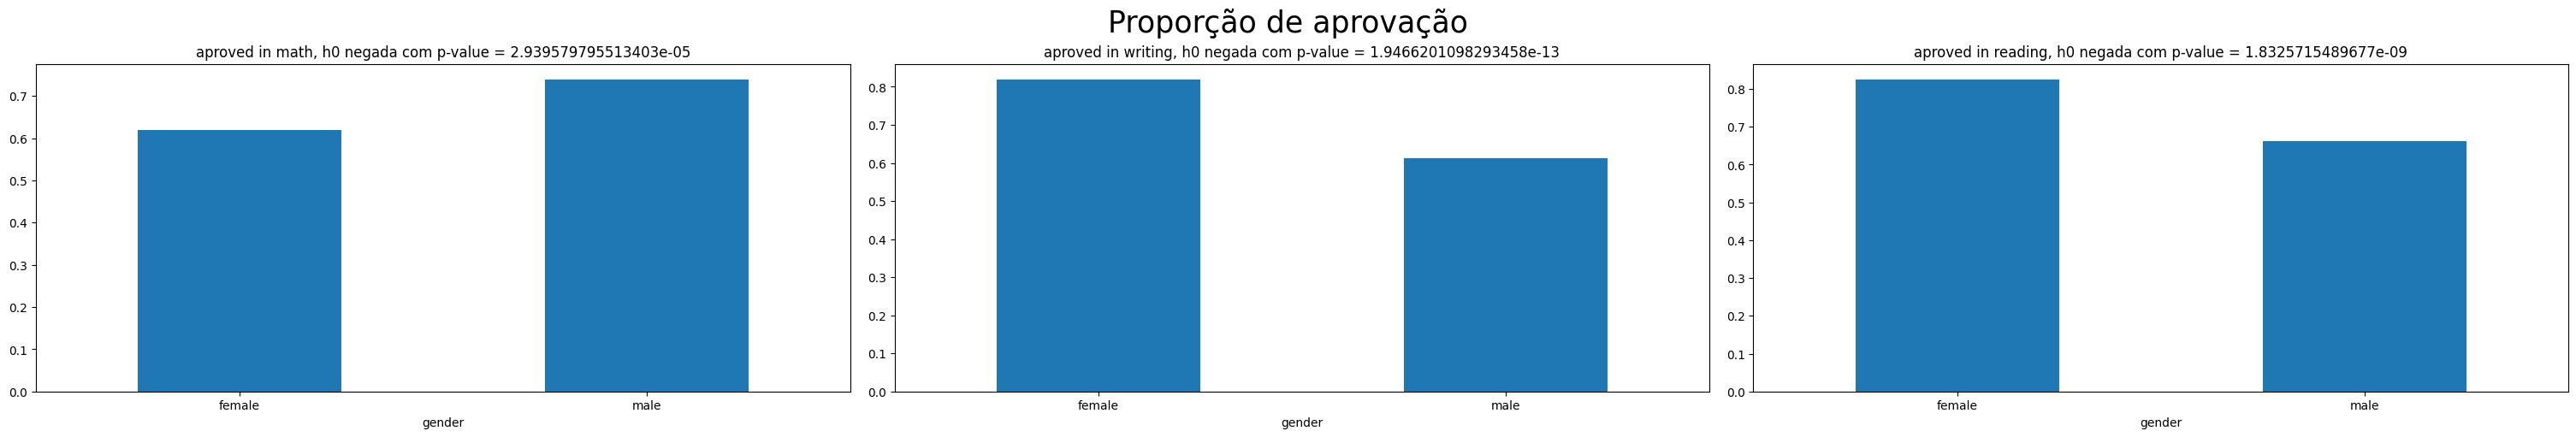

In [ ]:

plt.close()

fig, axs = plt.subplots(1, 3, figsize=(30, 5), constrained_layout=True)
fig.suptitle('Proporção de aprovação', fontsize=25)

for i, aproved_col in enumerate(aproved_cols):
    ## teste de hipotese
    # h0. p1  = p2
    # ha. p1 != p2
    c = .95
    alpha = 1-c

    x1 = StudentsPerformance[StudentsPerformance['gender'] == 'male'][aproved_col].sum()
    n1 = StudentsPerformance[StudentsPerformance['gender'] == 'male'].shape[0]
    p1 = x1/n1

    x2 = StudentsPerformance[StudentsPerformance['gender'] == 'female'][aproved_col].sum()
    n2 = StudentsPerformance[StudentsPerformance['gender'] == 'female'].shape[0]
    p2 = x2/n2
    
    p = (x1+x2)/(n1+n2)

    z_calculado = (p1-p2)/(p*(1-p)*(1/n1+1/n2))**(1/2)
    p_value = 1-norm.cdf(z_calculado) if z_calculado >= 0 else norm.cdf(z_calculado)

    full_title = f"{aproved_col}, h0 {'negada' if p_value <= alpha else 'aceita'} com p-value = {p_value}"

    StudentsPerformance.groupby('gender')[aproved_col].mean().plot.bar(ax=axs[i], rot=0, title=full_title)
    
print('R: Sim, a proporção de aprovados (probabilidade em aprovação) "Male" em "math" é maior, já para "writing" e "reading" é menor.')
plt.show()

##### - *Existe a possibilidade de haver viés de seleção?*

In [ ]:

print('''
      R: Depende, 
        (i) se quisermos inferir sobre a população "mundial" dado que nosso dataset é de uma escola possivelmente existe viés de seleção, isso pode se dar pela localização da escola, ou se é particular ou publica, onde pode impactar diretamente
        no modo de ensino e mais importante nos scores.
        (ii) se quisermos inferir sobre a população da escola toda dado que nosso dataset contem apenas os alunos que sentam na parte da frente da sala, ou de alunos que tem aulas com professores mais velhos, tais caracteristias podem dizer
        (isso é conclusão pessoal, enviesada talvez) que o dataset vai conter os alunos mais inteligentes (i.e. impacta no modo de ensino e mais importante nos scores).
        A melhor de não existir o viés de seleção é criar um dataset onde cada elemento foi "criado" por mero acaso (pego de forma aleatória) e não de uma forma praticamente proposital. Pensando nisso todo dataset é exposto ao viés de seleção,
        por isso é muito importante saber de onde e como o dataset foi construido.
      ''')


      R: Depende, 
        (i) se quisermos inferir sobre a população "mundial" dado que nosso dataset é de uma escola possivelmente existe viés de seleção, isso pode se dar pela localização da escola, ou se é particular ou publica, onde pode impactar diretamente
        no modo de ensino e mais importante nos scores.
        (ii) se quisermos inferir sobre a população da escola toda dado que nosso dataset contem apenas os alunos que sentam na parte da frente da sala, ou de alunos que tem aulas com professores mais velhos, tais caracteristias podem dizer
        (isso é conclusão pessoal, enviesada talvez) que o dataset vai conter os alunos mais inteligentes (i.e. impacta no modo de ensino e mais importante nos scores).
        A melhor de não existir o viés de seleção é criar um dataset onde cada elemento foi "criado" por mero acaso (pego de forma aleatória) e não de uma forma praticamente proposital. Pensando nisso todo dataset é exposto ao viés de seleção,
        por isso é muito 

##### - *Qual o impacto potencial em termos de número de aprovados, caso o curso seja implementado para todos? Estime cenários de expansão.*

In [ ]:

print('R:')

for aproved_col in aproved_cols:
    x = StudentsPerformance[StudentsPerformance['test preparation course'] == 'completed'][aproved_col].sum()
    n = StudentsPerformance[StudentsPerformance['test preparation course'] == 'completed'].shape[0]

    c = 0.95
    p = x/n
    a = 1-c

    ep = ((p*(1-p))/n)**(1/2)

    zs_critico = norm.ppf(a/2), norm.ppf(c+a/2)
    
    p_confidence_interval = (p, p+zs_critico[0]*ep, p+zs_critico[1]*ep)
    confidence_interval = [int(x) for x in np.array(p_confidence_interval)[1:]*StudentsPerformance.shape[0]]

    print(f'  em "{aproved_col.split()[-1]}", se o curso preparatório fosse aplicado para os {StudentsPerformance.shape[0]} alunos, á um nivel de confiança de {c} a quantidade de alunos aprovados seria de {confidence_interval[0]} a {confidence_interval[1]}.')

df_pAprovation = StudentsPerformance.groupby(['test preparation course'])[['aproved in math','aproved in writing','aproved in reading']].mean().T
df_pAprovation['dif'] = df_pAprovation['completed']-df_pAprovation['none']

print('- Todas as diferenças são significantes e maiores que 10%, com isso podemos alimentar o marketing para vender mais o curso preparatório.')


R:
  em "math", se o curso preparatório fosse aplicado para os 1000 alunos, á um nivel de confiança de 0.95 a quantidade de alunos aprovados seria de 712 a 801.
  em "writing", se o curso preparatório fosse aplicado para os 1000 alunos, á um nivel de confiança de 0.95 a quantidade de alunos aprovados seria de 824 a 896.
  em "reading", se o curso preparatório fosse aplicado para os 1000 alunos, á um nivel de confiança de 0.95 a quantidade de alunos aprovados seria de 805 a 881.
- Todas as diferenças são significantes e maiores que 10%, com isso podemos alimentar o marketing para vender mais o curso preparatório.
